# Aerofit - Descriptive Statistics & Probability
#### Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## 1. Problem Statement  and Analysing basic metrics
#### The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

### About Data 

#### The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

##### Product Purchased:KP281, KP481, or KP781
##### Age: In years
##### Gender:	Male/Female
##### Education:	In years
##### MaritalStatus:	Single or partnered
##### Usage:	The average number of times the customer plans to use the treadmill each week.
##### Income:	Annual income (in $)
##### Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
##### Miles:	The average number of miles the customer expects to walk/run each week
##### Product Portfolio:

##### 1. The KP281 is an entry-level treadmill that sells for $1,500 

##### 2. The KP481 is for mid-level runners that sell $1,750

##### 3. The KP781 treadmill is having advanced features that sell  $ 2,500

 ### Exploratory Data Analysis

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy

In [3]:
 # loading the dataset
df = pd.read_csv('aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Insights 
#####  From the above analysis, it is clear that, data has total of 9 features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.

### conversion of categorical attributes to 'category'

In [8]:
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["Product"]=df["Product"].astype("category")

### statistical summary

In [9]:
 #statisctical summary of categorical  type columns
df.describe(include = 'category')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Insights
##### Based on the "freq" value (frequency), KP281 seems to be the best-selling product (80).
##### Sales appear to be skewed towards males, with a higher frequency for males across all products
##### Individuals with "Partnered" marital status seem to be the most frequent buyers overall (107).


In [10]:
#statisctical summary of numerical type columns
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Insights
##### Age: The age demographic of customers ranges from 18 to 50 years, with a mean age of 29 years.
##### Education: Customers' educational attainment spans from 12 to 21 years, with an average duration of schooling of 16 years.
##### Usage: Customers plan to use the product between 2 and 7 times per week, with an average frequency of 3 times per week.
##### Fitness: On average, customers rate their fitness level at 3 out of 5, indicating a moderate level of fitness.
##### Income: Customers' annual incomes fall within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.
##### Miles: Customers' weekly running targets vary from 21 to 360 miles, with an average goal of 103 miles per week.

## 2. Non-Graphical Analysis

In [11]:
 df.duplicated().value_counts()

False    180
Name: count, dtype: int64

### Insights
##### There are no duplicate entries in the dataset

In [12]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [14]:
# checking the unique values for columns
for i in df.columns:
 print('Unique Values in',i,'column are :-')
 print(df[i].unique())
 print('-'*70)


Unique Values in Product column are :-
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
---------------------------------------------------------

### Insights
##### The dataset is quite good and it does not contain any abnormal values.

In [13]:
#checking null values in every column of our data
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Insights
##### There are no null values in the given dataset 

## 3 .Visual Analysis - Univariate & Bivariate 

#### 3.1 Univariate analysis: It examines a single variable at a time to understand its distribution, central tendency, and variability.

#### continuous variables

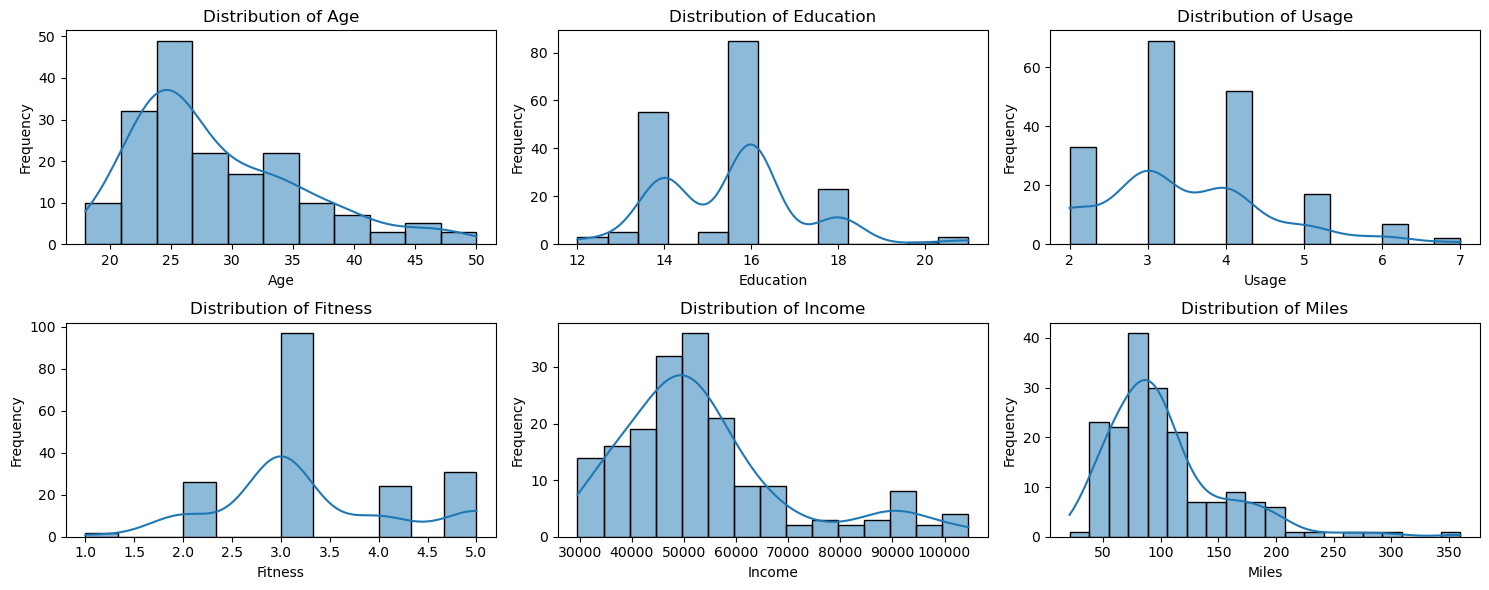

In [59]:
# Assuming 'continuous_vars' is a list containing names of continuous variables
continuous_vars = ['Age', 'Education','Usage','Fitness','Income', 'Miles']

# Calculate the number of rows needed based on the length of continuous_vars
num_rows = len(continuous_vars) // 3  # Integer division to get whole number of rows
if len(continuous_vars) % 3 != 0:
    num_rows += 1  # Add 1 if there are remaining variables

# Create subplots with three columns for each row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*3))

# Flatten axes array to simplify iteration
axes = axes.flatten()

# Iterate over each continuous variable and corresponding subplot
for i, col in enumerate(continuous_vars):
    sns.histplot(df[col], ax=axes[i], kde=True)  # Create distplot on each subplot
    axes[i].set_title(f"Distribution of {col}")  # Set title for each subplot
    axes[i].set_xlabel(col)  # Add x-axis label
    axes[i].set_ylabel("Frequency")  # Add y-axis label

# Hide empty subplots if the number of variables is not divisible by 3
for j in range(len(continuous_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

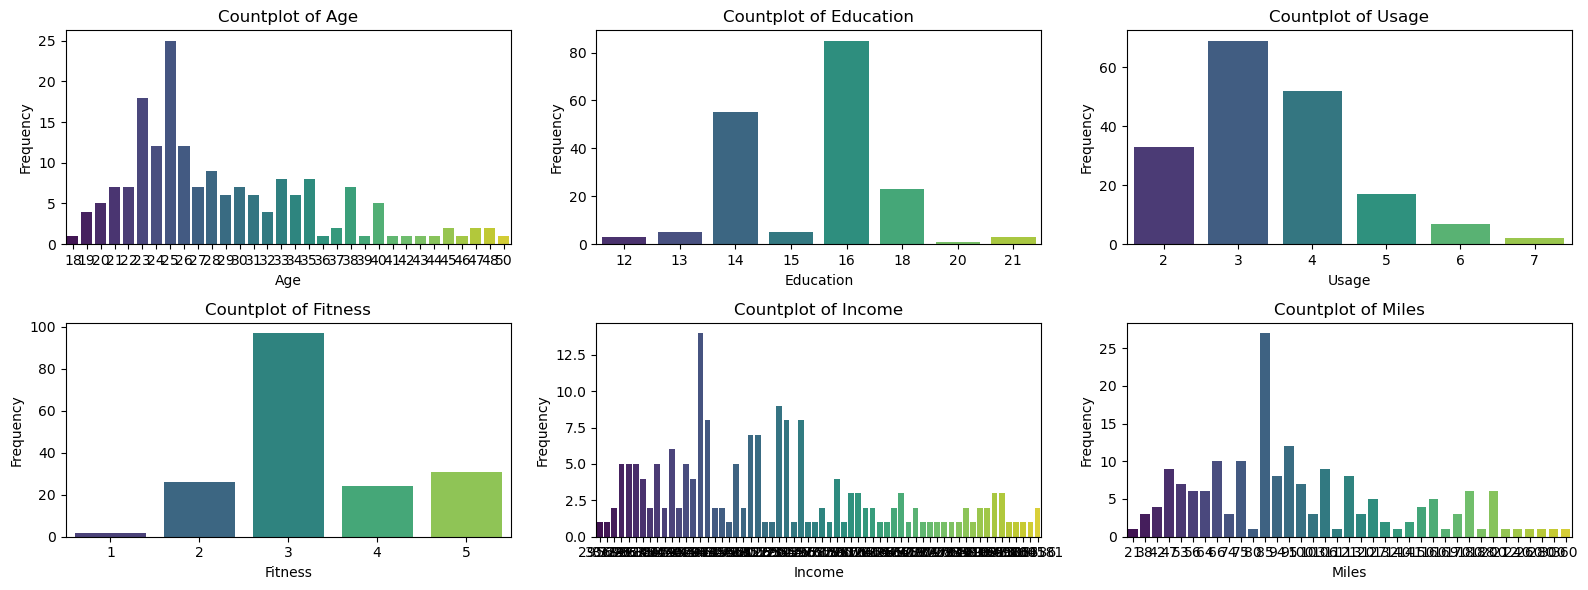

In [61]:


# Calculate the number of rows needed based on the length of continuous_vars
num_rows = len(continuous_vars) // 3  # Integer division to get whole number of rows
if len(continuous_vars) % 3 != 0:
    num_rows += 1  # Add 1 if there are remaining variables

# Create subplots with three columns for each row
fig, axes = plt.subplots(num_rows, 3, figsize=(16, num_rows*3))

# Flatten axes array to simplify iteration
axes = axes.flatten()

# Iterate over each continuous variable and corresponding subplot
for i, col in enumerate(continuous_vars):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis') 
    axes[i].set_title(f"Countplot of {col}")  # Set title for each subplot
    axes[i].set_xlabel(col)  # Add x-axis label
    axes[i].set_ylabel("Frequency")  # Add y-axis label

# Hide empty subplots if the number of variables is not divisible by 3
for j in range(len(continuous_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



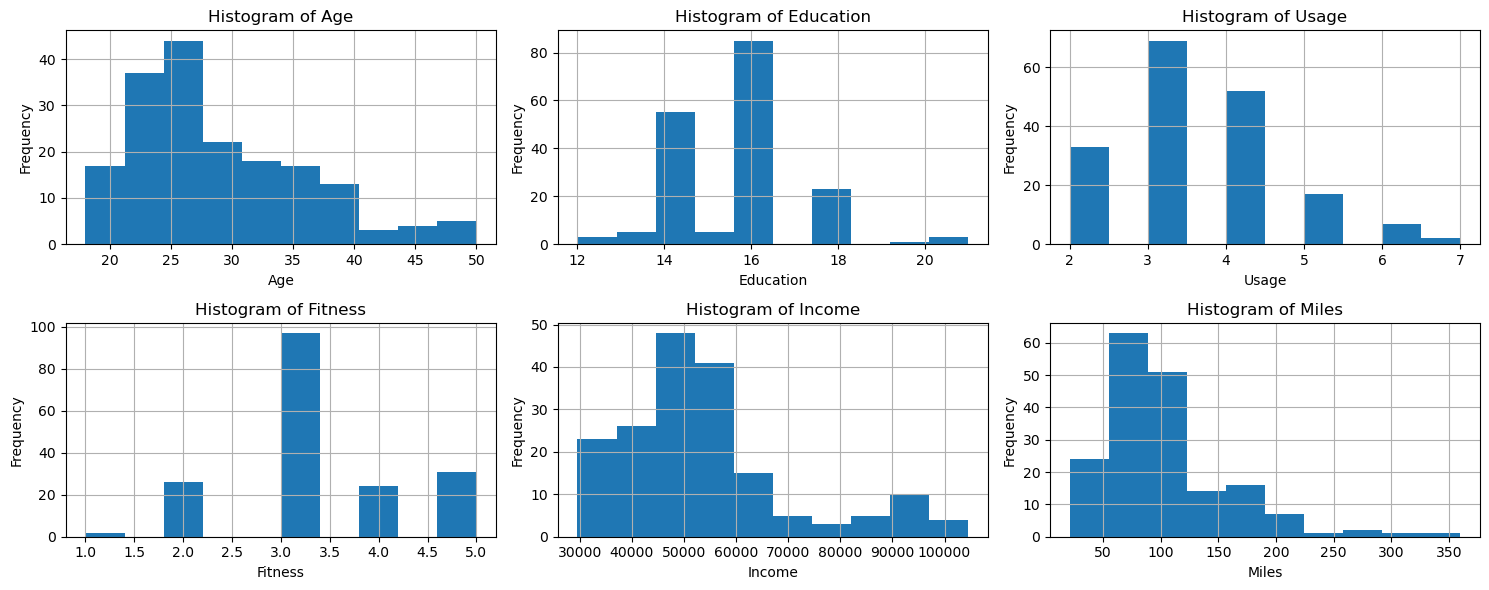

In [62]:
# Calculate the number of rows needed based on the length of continuous_vars
num_rows = len(continuous_vars) // 3  # Integer division to get whole number of rows
if len(continuous_vars) % 3 != 0:
    num_rows += 1  # Add 1 if there are remaining variables

# Create subplots with three columns for each row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*3))

# Flatten axes array to simplify iteration
axes = axes.flatten()

# Iterate over each continuous variable and corresponding subplot
for i, col in enumerate(continuous_vars):
    df[col].hist(ax=axes[i])  # Create histogram on each subplot
    axes[i].set_title(f"Histogram of {col}")  # Set title for each subplot
    axes[i].set_xlabel(col)  # Add x-axis label
    axes[i].set_ylabel("Frequency")  # Add y-axis label

# Hide empty subplots if the number of variables is not divisible by 3
for j in range(len(continuous_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### Insights
##### Most of the users are around 25 years of age, having 16 years of education with around $50000 of annual income.
##### Majority of the users have fitness of level 3, use the treadmill 3 times a week and walk/run around 90 miles each week

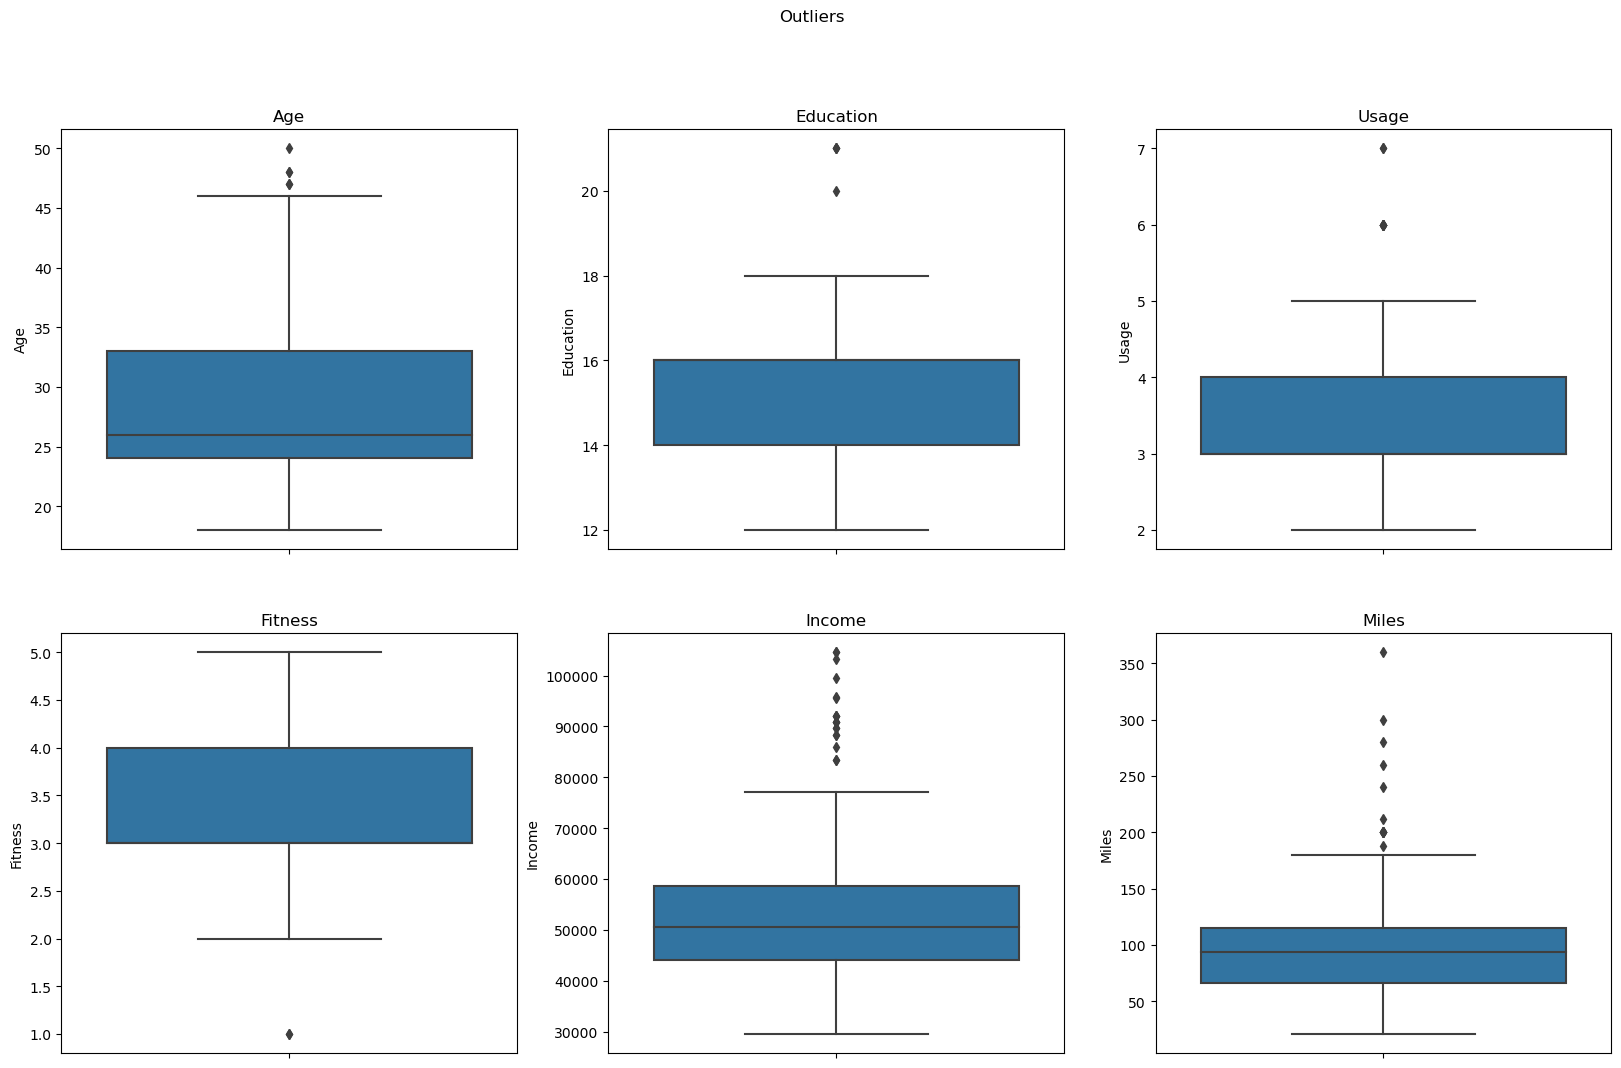

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(2):
    for j in range(3):
        variable = continuous_vars[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable)
        axes[i, j].set_title(variable) 
        
plt.suptitle("Outliers")
plt.show();


### Insights 
##### There appear to be numerous outliers in the Income and Miles columns.

#### 3.2 Bivariate analysis refers to a statistical method used to examine the relationship between two variables. It's a fundamental technique for exploring how changes in one variable might be associated with changes in another.

#### Products Vs Marital Status

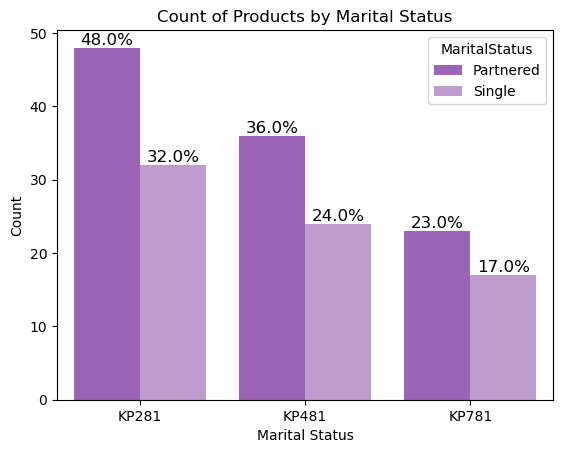

In [ ]:

custom_palette =sns.diverging_palette(290, 300, s=60)
marital_status_counts = df['MaritalStatus'].value_counts()
sns.countplot(x="Product", hue="MaritalStatus", data=df, palette=custom_palette)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Count of Products by Marital Status")
def format_percentages(x):
    return f"{x:.1f}%"  # Customize format string (e.g., "{x:.2f}%" for two decimal places)

# Add percentages to countplot bars
for container in plt.gca().containers:  # Get container objects for bars
    rects = container.get_children()  # Get individual bar rectangles
    for rect in rects:
        height = rect.get_height()  # Get bar height
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.05, format_percentages(height), ha="center", va="bottom", fontsize=12)

plt.show()



###  Insights
##### For all the three treadmill models, there is uniform distribution of Married and Single customers with married customers showing slighly higher preference


#### Products Vs Gender

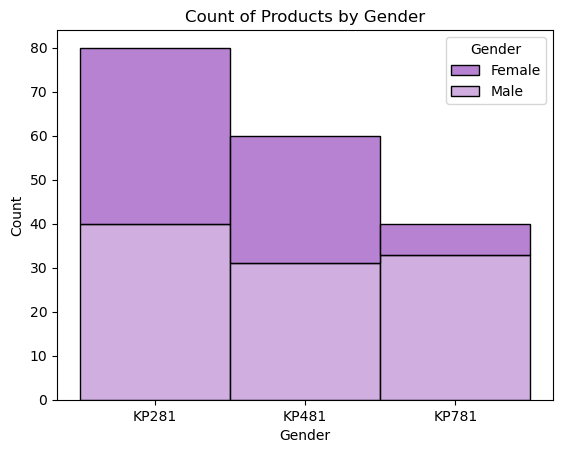

In [184]:

# Histogram for Gender and product purchased
sns.histplot(df, x='Product', hue='Gender', multiple="stack",palette=custom_palette)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of Products by Gender")
plt.show()

#### Products Vs Age

###  Insights
##### Treadmill model KP781 is preferred more by male customers .
##### Both treadmill models, KP481 and KP281 , show equal distribution of both the gender

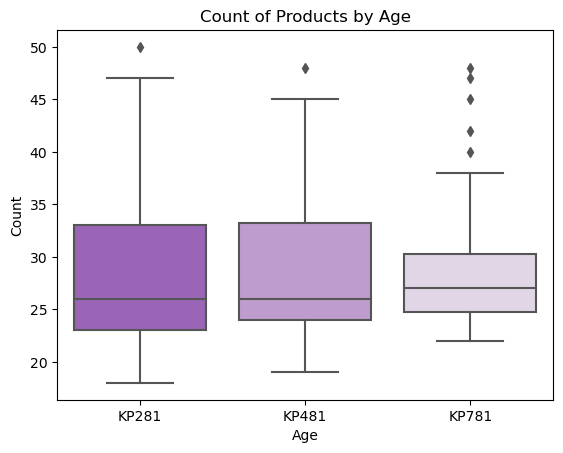

In [185]:

# Boxplot for age and product purchased
sns.boxplot(x='Product', y='Age', data=df,palette=custom_palette)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Products by Age")
plt.show()

### Insights
##### Customers between the ages of 23 and 32 tend to purchase the Treadmills KP281 and KP481, whereas KP781 seems to be less popular among this age group. 

## 4. Detecting Outliers using describe method

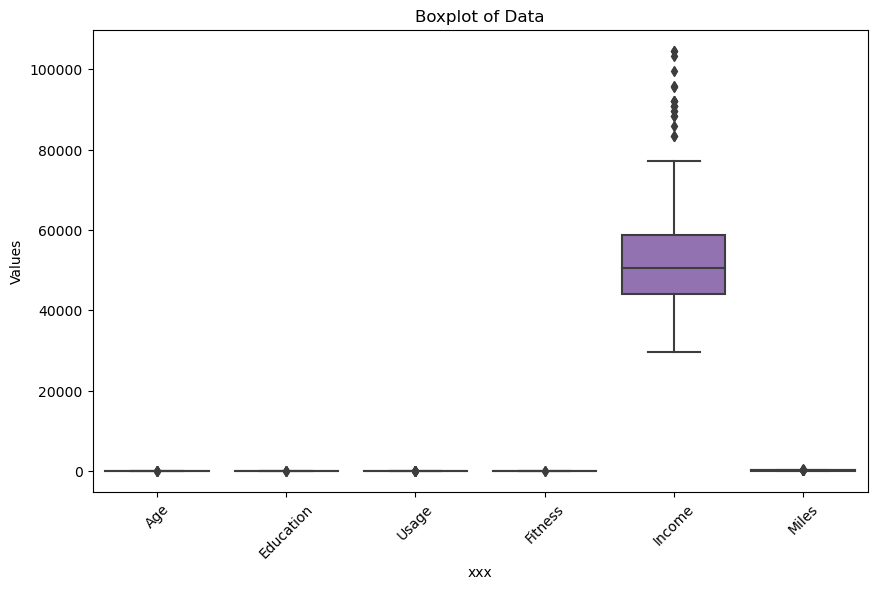

Outliers detected:
Variable: Age
  - Outlier indices: [78, 79, 139, 178, 179]
  - Z-scores: [2.622757399223028, 3.054816275239024, 2.7667770245616934, 2.622757399223028, 2.7667770245616934]
Variable: Education
  - Outlier indices: [156, 157, 161, 175]
  - Z-scores: [2.73817406186012, 3.356582256508579, 3.356582256508579, 3.356582256508579]
Variable: Usage
  - Outlier indices: [154, 155, 162, 163, 164, 166, 167, 170, 175]
  - Z-scores: [2.345548857312817, 2.345548857312817, 2.345548857312817, 3.2673802859510426, 2.345548857312817, 3.2673802859510426, 2.345548857312817, 2.345548857312817, 2.345548857312817]
Variable: Fitness
  - Outlier indices: [14, 117]
  - Z-scores: [-2.4102480715054155, -2.4102480715054155]
Variable: Income
  - Outlier indices: [159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
  - Z-scores: [1.7990543597494595, 2.1007503231388793, 2.2515983048335895, 2.327022295680944, 2.1007503231388793, 1.9499023414441694, 2.25159830483

In [111]:


# Function to detect outliers
def detect_outliers(df):
    outliers_detected = {}  # Dictionary to store outlier detection results
    
    # Step 1: Visualize potential outliers using boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.title("Boxplot of Data")
    plt.xlabel("Variables")
    plt.ylabel("Values")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Step 2: Calculate summary statistics using the "describe" method
    summary_stats = df.describe()
    
    for column in df.select_dtypes(include='number').columns:
        # Calculate IQR
        q1 = summary_stats.loc['25%', column]
        q3 = summary_stats.loc['75%', column]
        iqr = q3 - q1

        # Calculate Z-scores
        z_scores = (df[column] - df[column].mean()) / df[column].std()

        # Identify outliers using Z-scores and IQR
        outliers = df[(abs(z_scores) > 3) | (df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)]

        # Add outliers information to dictionary
        if not outliers.empty:
            outliers_detected[column] = {
                "outlier_values": outliers.index.tolist(),
                "z_scores": z_scores[outliers.index].tolist(),
            }

    return outliers_detected

# Example usage
outliers = detect_outliers(df.copy())  # Avoid modifying the original DataFrame

if outliers:
    print("Outliers detected:")
    for variable, info in outliers.items():
            print(f"Variable: {variable}")
            print(f"  - Outlier indices: {info['outlier_values']}")
            print(f"  - Z-scores: {info['z_scores']}")
else:
      print("No outliers detected.")


### Insights 
##### There appear to be numerous outliers in the Income and Miles columns.

### Adding new columns for better analysis
##### Creating New Column and Categorizing values in Age,Education,Income and Miles to different classes for better visualization
##### Age Column
##### Categorizing the values in age column in 4 different buckets:
1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above
##### Education Column
##### Categorizing the values in education column in 3 different buckets:
1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above
##### Income Column
##### Categorizing the values in Income column in 4 different buckets:
1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000
##### Miles column
##### Categorizing the values in miles column in 4 different buckets:
1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [188]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)
#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)
#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)
#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)


In [189]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


 ### 5. Correlation between Variables

#### Pairplot

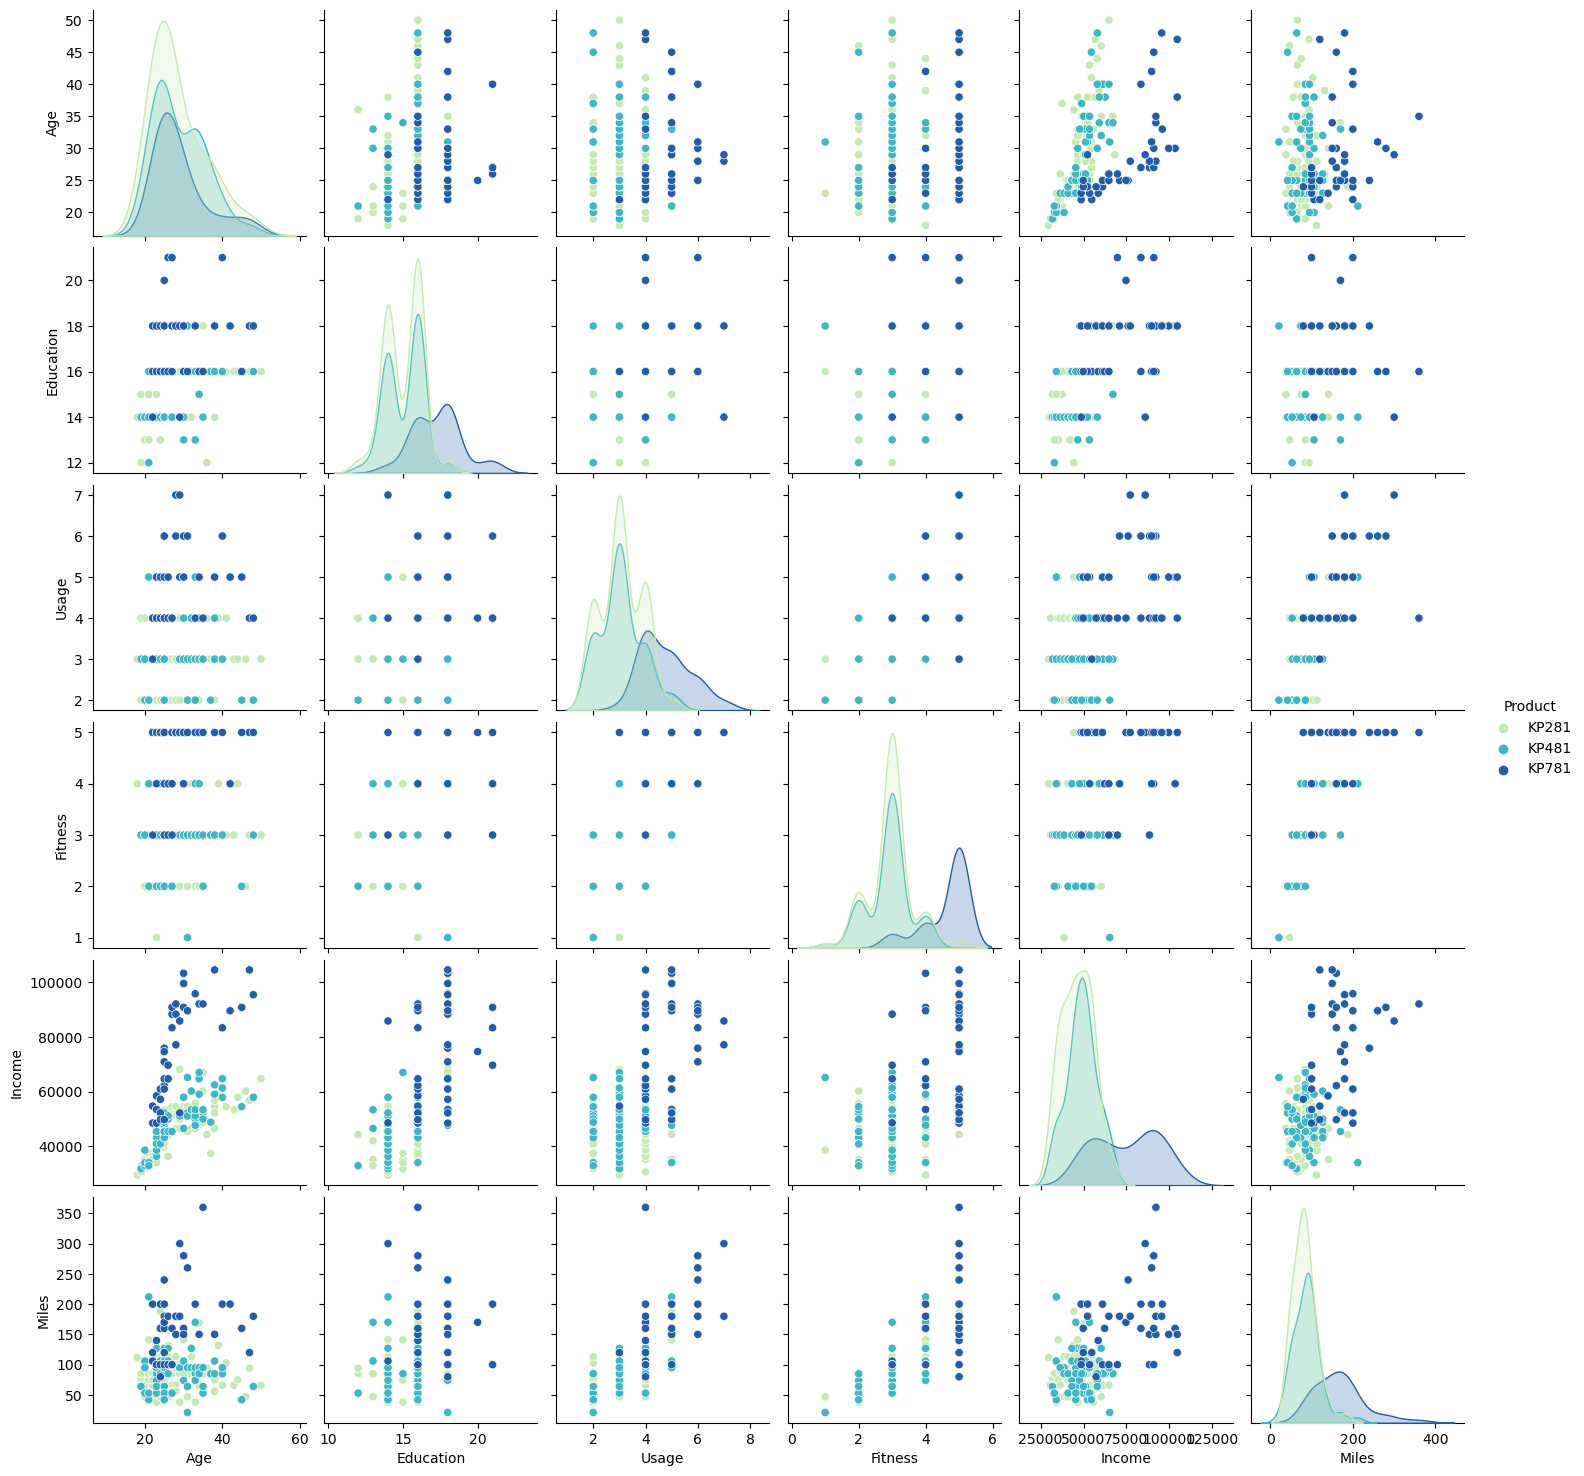

In [199]:
df_copy = copy.deepcopy(df)
sns.pairplot(df_copy, hue ='Product', palette= 'YlGnBu')
plt.show()

### Insights
##### From above plots we can clearly distinguish the user of KP781 based on Fitness, Miles, Income and Usage
##### The users of KP281 and KP481 are similar in pattern. This will require a deeper analysis to differentiate between the two.

### Heatmap

In [205]:
 # First we need to convert object into int datatype for usage and fitness columns 
df_copy['Usage'] = df_copy['Usage'].astype('int64')
df_copy['Fitness'] = df_copy['Fitness'].astype('int64')
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(7), int64(6)
memory usage: 10.9 KB


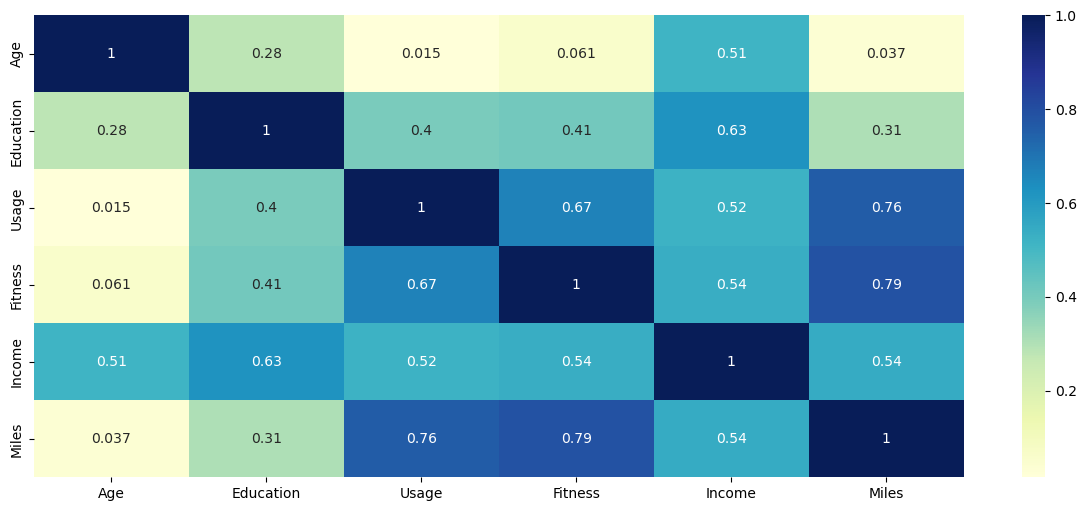

In [206]:
numeric_df = df_copy.select_dtypes(include=['float64', 'int64']) 
corr_mat = numeric_df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")
plt.show()


### Insights
##### From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
##### Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
##### Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.


### 6. Probability

In [196]:
cross_tab = pd.crosstab(index=df['Product'], columns='count')

# Calculate the marginal probability by dividing each frequency by the total number of observations
marginal_prob = cross_tab / cross_tab.sum()

# Print the marginal probability table
print("Marginal Probability of Treadmill Models:")
print(marginal_prob)

Marginal Probability of Treadmill Models:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


### Insights 
##### Probability that a user will buy KP281 is 44%
##### Probability that a user will buy KP481 is 44%
##### Probability that a user will buy KP781 is 22%
##### KP281 is the most popular product

###  6.1 Probability of a male customer buying a KP781 treadmill

In [207]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### Insights
##### 1.Probability of treadmill being purchased by a female is 42%
##### The conditional probability of purchasing the treadmill model given that the customer is female is
##### For Treadmill model KP281 - 22%
##### For Treadmill model KP481 - 16%
##### For Treadmill model KP781 - 4%
##### 2. The Probability of a treadmill being purchased by a male is 58% .
##### The conditional probability of purchasing the treadmill model given that the customer is male is -
##### For Treadmill model KP281 - 22%
##### For Treadmill model KP481 - 17%
##### For Treadmill model KP781 - 18%


### 6.2 Probability of product purchase w.r.t. Age

In [208]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a Young Adult(18-25) is 44% .
##### The conditional probability of purchasing the treadmill model given that the customer is Young Adult is
##### For Treadmill model KP281 - 19%
##### For Treadmill model KP481 - 16%
##### For Treadmill model KP781 - 9%
##### 1. The Probability of a treadmill being purchased by a Adult(26-35) is 41% .
##### The conditional probability of purchasing the treadmill model given that the customer is Adult is -
##### For Treadmill model KP281 - 18%
##### For Treadmill model KP481 - 13%
##### For Treadmill model KP781 - 9%
##### 1. The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12% .
##### 1. The Probability of a treadmill being purchased by a Elder(Above 45) is only 3% 

### 6.3 Probability of product purchase w.r.t. Education level

In [210]:
 pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62% .
##### The conditional probability of purchasing the treadmill model given that the customer has Higher Education is
##### For Treadmill model KP281 - 23%
##### For Treadmill model KP481 - 18%
##### For Treadmill model KP781 - 21%
##### 1. The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36% .
##### The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -
##### For Treadmill model KP281 - 21%
##### For Treadmill model KP481 - 14%
##### For Treadmill model KP781 - 1%
##### 1. The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2% .


### 6.4 Probability of product purchase w.r.t. Income

In [ ]:
 pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

##### 1. The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18% .
##### The conditional probability of purchasing the treadmill model given that the customer has Low Income is -
##### For Treadmill model KP281 - 13%
##### For Treadmill model KP481 - 5%
##### For Treadmill model KP781 - 0%
##### 1. The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59% .
##### The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -
##### For Treadmill model KP281 - 28%
##### For Treadmill model KP481 - 24%
##### For Treadmill model KP781 - 6%
##### 1. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%
##### The conditional probability of purchasing the treadmill model given that the customer has High Income is -
##### For Treadmill model KP281 - 3%
##### For Treadmill model KP481 - 4%
##### For Treadmill model KP781 - 6%
##### 1. The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%
##### The conditional probability of purchasing the treadmill model given that the customer has High Income is -
##### For Treadmill model KP281 - 0%
##### For Treadmill model KP481 - 0%
##### For Treadmill model KP781 - 11%

### 6.5 Probability of product purchase w.r.t. Marital Status

In [212]:
 pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a Married Customer is 59% .
##### The conditional probability of purchasing the treadmill model given that the customer is Married is
##### For Treadmill model KP281 - 27%
##### For Treadmill model KP481 - 20%
##### For Treadmill model KP781 - 13%
##### 1. The Probability of a treadmill being purchased by a Unmarried Customer is 41% .
##### The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -
##### For Treadmill model KP281 - 18%
##### For Treadmill model KP481 - 13%
##### For Treadmill model KP781 - 9%


### 6.6 Probability of product purchase w.r.t. Weekly Usage

In [213]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38% .
##### The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -
##### For Treadmill model KP281 - 21%
##### For Treadmill model KP481 - 17%
##### For Treadmill model KP781 - 1%
##### 1. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29% .
##### The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -
##### For Treadmill model KP281 - 12%
##### For Treadmill model KP481 - 7%
##### For Treadmill model KP781 - 10%
##### 2. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%
##### The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -
##### For Treadmill model KP281 - 11%
##### For Treadmill model KP481 - 8%
##### For Treadmill model KP781 - 0%

###  6.7 Probability of product purchase w.r.t. Customer Fitness

In [215]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54% .
##### The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -
##### For Treadmill model KP281 - 30%
##### For Treadmill model KP481 - 22%
##### For Treadmill model KP781 - 2%
##### 1. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15% .
##### 1. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1% .


### 6.8 Probability of product purchase w.r.t. weekly mileage

In [217]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


### Insights
##### 1. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9% .
##### The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -
##### For Treadmill model KP281 - 7%
##### For Treadmill model KP481 - 3%
##### For Treadmill model KP781 - 0%
##### 1. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54% .
##### The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -
##### For Treadmill model KP281 - 28%
##### For Treadmill model KP481 - 22%
##### For Treadmill model KP781 - 4%
##### 1. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33% .
##### The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -
##### For Treadmill model KP281 - 10%
##### For Treadmill model KP481 - 8%
##### For Treadmill model KP781 - 15%
##### 1. The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only


### 7. Customer Profiling

##### Based on above analysis
 ##### 1. Probability of purchase of KP281 = 44%
 ##### 2. Probability of purchase of KP481 = 33%
 ##### 3. Probability of purchase of KP781 = 22%
##### Customer Profile for KP281 Treadmill:
 ##### 1. Age of customer mainly between 18 to 35 years with few between 35 to 50 years
 ##### 2. Education level of customer 13 years and above
 ##### 3. Annual Income of customer below USD 60,000 Weekly Usage - 2 to 4 times
 ##### 4. Fitness Scale - 2 to 4 Weekly Running Mileage - 50 to 100 miles
##### Customer Profile for KP481 Treadmill:
 ##### 1. Age of customer mainly between 18 to 35 years with few between 35 to 50 years
 ##### 2. Education level of customer 13 years and above
 ##### 3. Annual Income of customer between USD 40,000 to USD 80,000 Weekly Usage - 2 to 4 times
 ##### 4. Fitness Scale - 2 to 4 Weekly Running Mileage - 50 to 200 miles
##### Customer Profile for KP781 Treadmill:
 ##### 1. Gender - Male
 ##### 2. Age of customer between 18 to 35 years
 ##### 3. Education level of customer 15 years and above
 ##### 4.Annual Income of customer USD 80,000 and above Weekly Usage - 4 to 7 times
 ##### 5.Fitness Scale - 3 to 5 Weekly Running Mileage - 100 miles and above


### 8. Recommendations
#### Marketing Campaigns for KP781
#####    The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.
#### Affordable Pricing and Payment Plans
#####   Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.
#### User-Friendly App Integration
#####   Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.
